In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile

# Unzip the file
with zipfile.ZipFile('/content/drive/MyDrive/Spring/6053 - Machine Learning/Project 2/project_2_training.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('')

# Load the dataset
df = pd.read_csv('project_2_training.csv')

# Display the first few rows of the dataframe
df.head()


,EVENT_ID,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,...,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,EVENT_LABEL
0,2608000,5774.0,2172.0,78.0,4523.0,81.237.240.91,Mozilla/5.0 (iPod; U; CPU iPhone OS 3_0 like M...,graves.org,456-910-9478,South Angelaville,...,R,2021-02-21 16:32:23,Kristi Bell,7683 Chavez Curve,882-35-3409,es_VE,Q,82.0,4609.0,legit
1,214500,5405.0,2887.0,51.0,4057.0,160.32.216.178,Mozilla/5.0 (Macintosh; PPC Mac OS X 10 10_7) ...,howard-madden.com,269.363.8079,Lake Leslietown,...,O,2020-12-30 11:36:17,Amanda Bond,628 Cline Streets,453-93-1357,bhb_IN,S,2.0,12384.0,legit
2,294600,6570.0,2887.0,56.0,5602.0,109.156.235.28,Mozilla/5.0 (Windows NT 6.2) AppleWebKit/535.2...,walsh-goodwin.com,366.185.9975,Lake Kendra,...,C,2021-03-24 05:34:28,Joanna Walton,268 Ashley Plaza Apt. 416,554-51-8940,mi_NZ,W,43.0,9607.0,legit
3,477060,3865.0,1591.0,58.0,3926.0,158.152.249.45,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,gonzalez-diaz.com,816-365-8213,East Maryport,...,G,2021-10-12 16:24:49,Matthew Johnson,8377 Jacob Course,492-66-7677,yue_HK,Y,71.0,10305.0,legit
4,1993100,6625.0,3297.0,70.0,6675.0,167.164.91.31,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,bender-rocha.info,001-970-935-1735x19620,Yorkburgh,...,W,2021-06-23 00:05:15,Susan Phillips,401 Christopher Meadows,468-86-6030,gd_GB,Q,52.0,4139.0,legit


# Data Exploration and Preprocessing

In [ ]:
df.columns

Index(['EVENT_ID', 'account_age_days', 'transaction_amt',
       'transaction_adj_amt', 'historic_velocity', 'ip_address', 'user_agent',
       'email_domain', 'phone_number', 'billing_city', 'billing_postal',
       'billing_state', 'card_bin', 'currency', 'cvv', 'signature_image',
       'transaction_type', 'transaction_env', 'EVENT_TIMESTAMP',
       'applicant_name', 'billing_address', 'merchant_id', 'locale',
       'tranaction_initiate', 'days_since_last_logon', 'inital_amount',
       'EVENT_LABEL'],
      dtype='object')

### Target Variable Distribution

About 94.6% Legit accounts and 5.4% Fraud accounts

So our default accuracy is 0.946

In [ ]:
df['EVENT_LABEL'].value_counts(normalize=True)

legit    0.94572
fraud    0.05428
Name: EVENT_LABEL, dtype: float64

### Missing Values

Out of the 26 columns, 21 contained at least 1 missing value with the most being in 'applicant_name' and 'days_since_last_logon' columns.

In [ ]:
df.isna().sum() / df.shape[0]

EVENT_ID                 0.000000
account_age_days         0.000000
transaction_amt          0.000000
transaction_adj_amt      0.000000
historic_velocity        0.000000
ip_address               0.000832
user_agent               0.000760
email_domain             0.000608
phone_number             0.000816
billing_city             0.000752
billing_postal           0.000784
billing_state            0.000752
card_bin                 0.000880
currency                 0.000752
cvv                      0.000816
signature_image          0.000736
transaction_type         0.000784
transaction_env          0.000832
EVENT_TIMESTAMP          0.000720
applicant_name           0.000992
billing_address          0.000888
merchant_id              0.000712
locale                   0.000920
tranaction_initiate      0.000800
days_since_last_logon    0.000904
inital_amount            0.000872
EVENT_LABEL              0.000000
dtype: float64

# Need to Fill Missing Values for Exploratroy Analysis

Only going to fill variables of interest. Numeric columns will be filled with mean; categorical with mode.



*   account_age_days (mean)
*   transaction_amt (mean)
*   transaction_adj_amt (mean)
*   historic_velocity (mean)
*   initial_amount (mean)
*   transaction_initiate (mode)
*   transaction_type(mode)
*   transaction_env(mode)
*   currency(mode)
*   email_domain(mode)
*   billing_postal(mode)



In [ ]:
df_eda = df.copy()

df_eda['account_age_days'].fillna(df_eda['account_age_days'].mean(), inplace = True)
df_eda['transaction_amt'].fillna(df_eda['transaction_amt'].mean(), inplace = True)
df_eda['transaction_adj_amt'].fillna(df_eda['transaction_adj_amt'].mean(), inplace = True)
df_eda['historic_velocity'].fillna(df_eda['historic_velocity'].mean(), inplace = True)
df_eda['inital_amount'].fillna(df_eda['inital_amount'].mean(), inplace = True)
df_eda['days_since_last_logon'].fillna(df_eda['days_since_last_logon'].mean(), inplace = True)

df_eda['tranaction_initiate'].fillna(df_eda['tranaction_initiate'].mode()[0], inplace = True)
df_eda['transaction_type'].fillna(df_eda['transaction_type'].mode()[0], inplace = True)
df_eda['transaction_env'].fillna(df_eda['transaction_env'].mode()[0], inplace = True)
df_eda['currency'].fillna(df_eda['currency'].mode()[0], inplace = True)
df_eda['email_domain'].fillna(df_eda['email_domain'].mode()[0], inplace = True)
df_eda['billing_postal'].fillna(df_eda['billing_postal'].mode()[0], inplace = True)

In [ ]:
df_eda['billing_postal'] = df_eda['billing_postal'].astype(str)

### Box Plot of Numeric Columns to look for potential outliers

Nothing crazy sticks out. There are a few instances where transaction amounts were $0 but it occured for both Fraud and Legit accounts.

In [ ]:
num_cols = df_eda.select_dtypes(include=np.number).columns.to_list()
num_cols.remove('EVENT_ID')
# num_cols.remove('billing_postal')
num_cols.remove('card_bin')
# num_cols.remove('account_age_days')
num_cols

['account_age_days',
 'transaction_amt',
 'transaction_adj_amt',
 'historic_velocity',
 'days_since_last_logon',
 'inital_amount']

<Figure size 800x600 with 0 Axes>

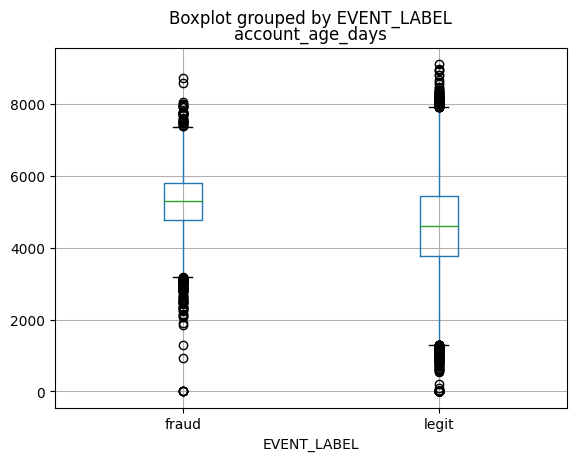

<Figure size 800x600 with 0 Axes>

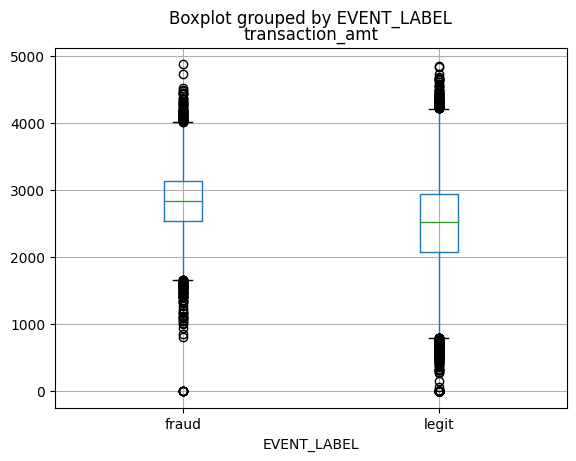

<Figure size 800x600 with 0 Axes>

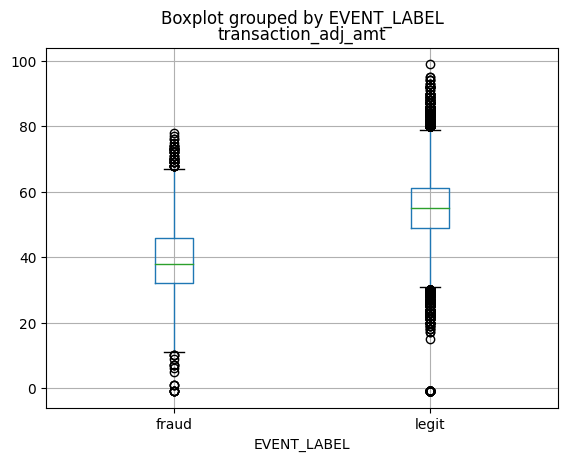

<Figure size 800x600 with 0 Axes>

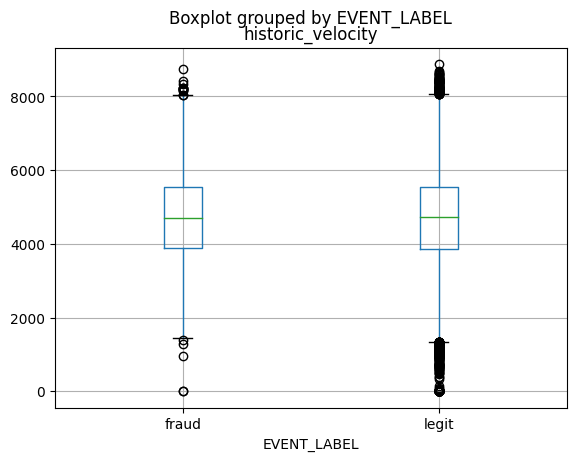

<Figure size 800x600 with 0 Axes>

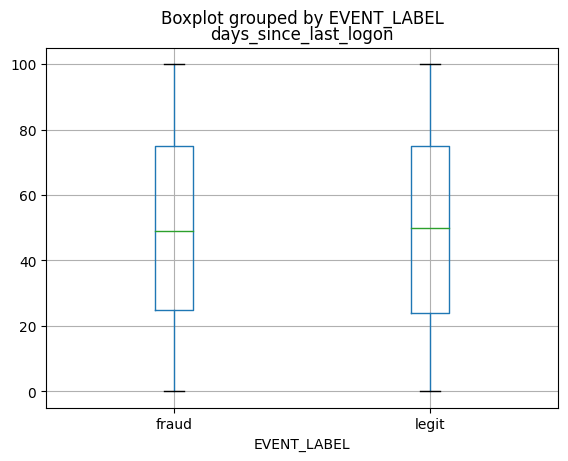

<Figure size 800x600 with 0 Axes>

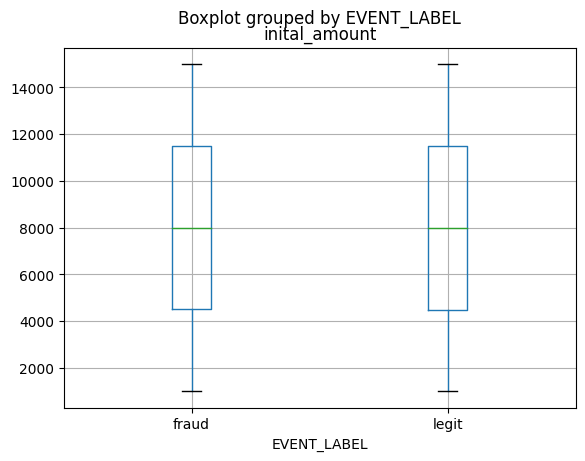

In [ ]:
for col in num_cols:
  plt.figure(figsize= (8,6))
  df_eda.boxplot(column= col, by = 'EVENT_LABEL')
  plt.show()

### Take a look at Histograms for any patterns

We can see that Fraud accounts have a slightly older account age on average. Fraud accounts also have a higher average transaction amount but a lower average transaction adjusted amount.

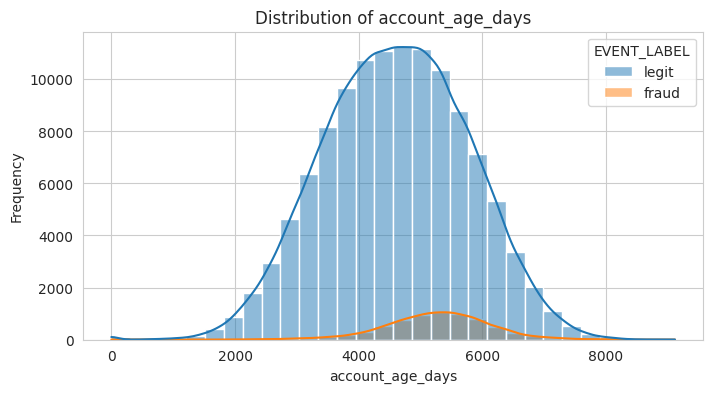

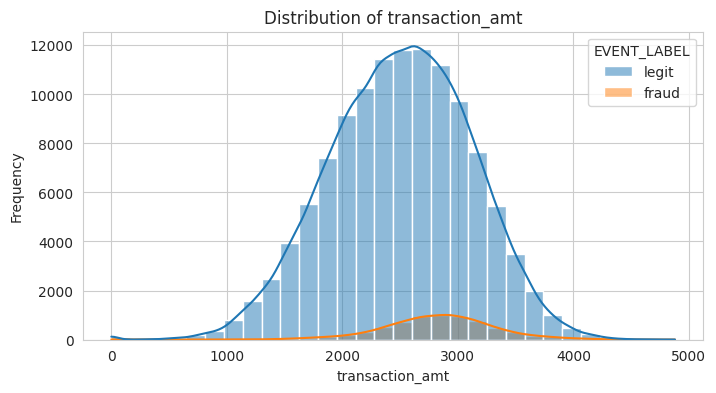

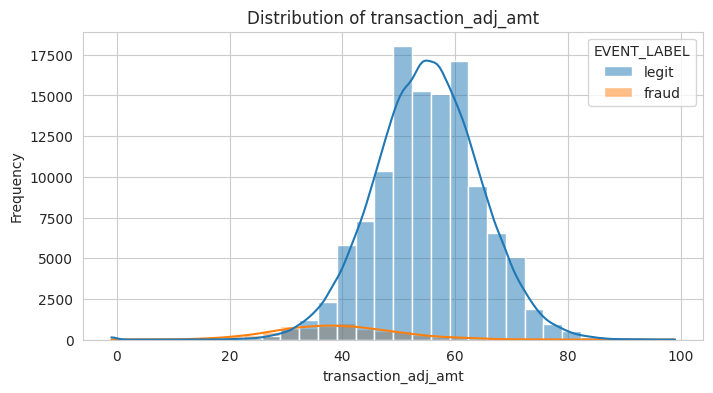

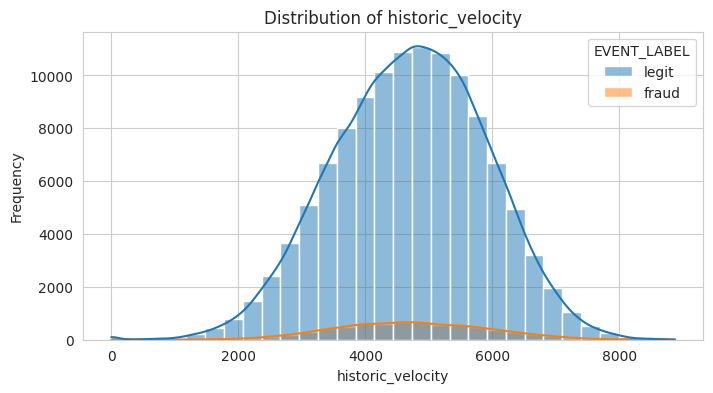

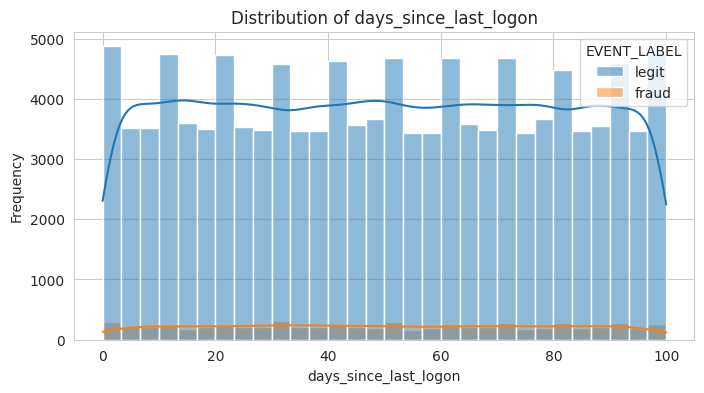

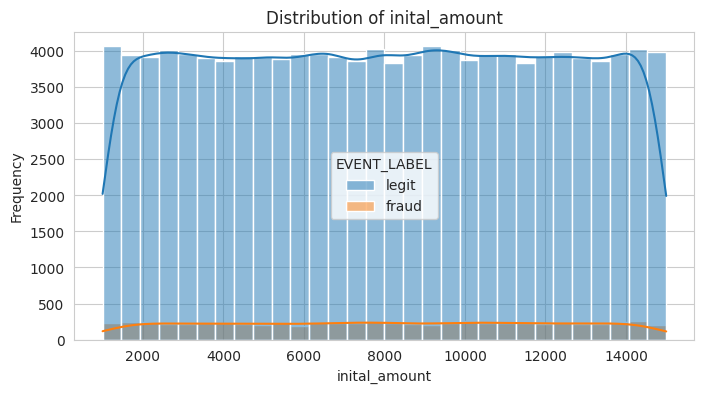

In [ ]:
import seaborn as sns

sns.set_style("whitegrid")

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data= df_eda, x=col, hue="EVENT_LABEL", kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


# Categorical Variable Analysis

### Transaction Initiate

In [ ]:
df_eda['tranaction_initiate'].value_counts()

N    5059
G    4896
D    4880
P    4868
A    4859
V    4852
M    4850
K    4847
Z    4836
W    4827
Q    4823
L    4811
F    4809
C    4799
T    4797
E    4792
R    4788
H    4784
J    4771
I    4752
B    4750
X    4741
Y    4718
O    4716
U    4701
S    4674
Name: tranaction_initiate, dtype: int64

### All Transaction Initiates are pretty evenly distributed

<Figure size 1000x800 with 0 Axes>

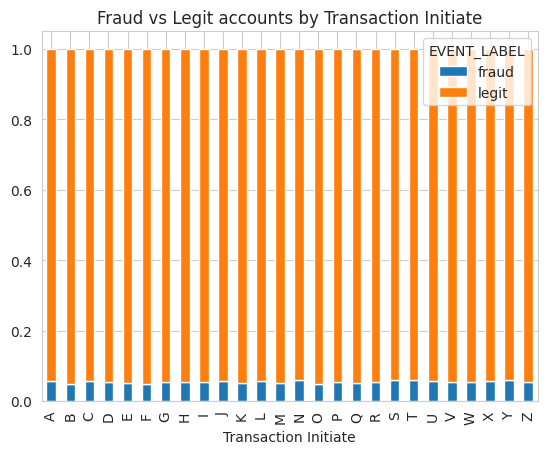

In [ ]:
trans_in = df_eda.groupby('tranaction_initiate')['EVENT_LABEL'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10,8))
trans_in.plot(kind='bar', stacked=True)
plt.xlabel('Transaction Initiate')
plt.title('Fraud vs Legit accounts by Transaction Initiate')
plt.show()

### Transaction Enviornment

Plot as stacked bar chart

In [ ]:
df_eda['transaction_env'].value_counts()

D    18980
W    17826
G    17258
X    14297
I    13935
C     9853
F     9537
Z     5852
U     5720
H     3276
R     3092
S     1724
O     1327
V      787
E      544
N      385
T      190
Q      156
B       98
M       51
J       48
P       25
A       15
K       14
L        7
Y        3
Name: transaction_env, dtype: int64

<Figure size 1000x800 with 0 Axes>

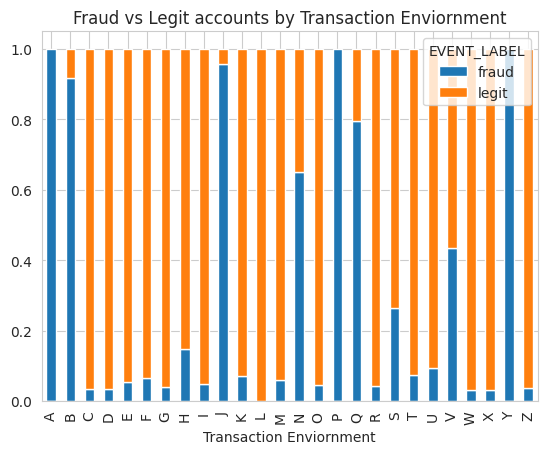

In [ ]:
trans_env = df_eda.groupby('transaction_env')['EVENT_LABEL'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10,8))
trans_env.plot(kind='bar', stacked=True)
plt.xlabel('Transaction Enviornment')
plt.title('Fraud vs Legit accounts by Transaction Enviornment')
plt.show()

Transaction Enviornments A, B, J, N, P, Q, and Y all had very high percentage of Fraud, even though they did not occur as often. This lets us know that if we see these transaction enviornments pop up, we should be cautious because there is a high chance it is fraud.

### Transaction Type

<Figure size 1000x800 with 0 Axes>

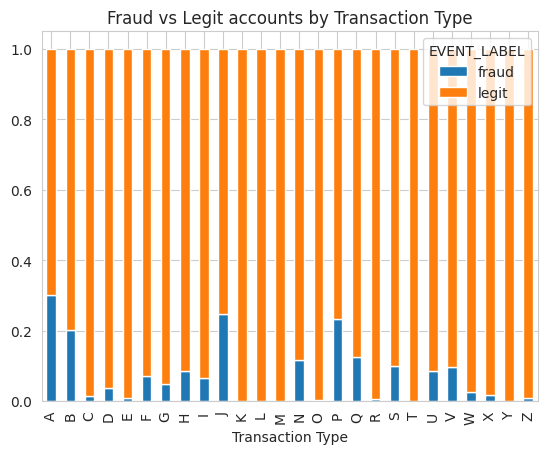

In [ ]:
trans_type = df_eda.groupby('transaction_type')['EVENT_LABEL'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10,8))
trans_type.plot(kind='bar', stacked=True)
plt.xlabel('Transaction Type')
plt.title('Fraud vs Legit accounts by Transaction Type')
plt.show()

### Currency

<Figure size 1000x800 with 0 Axes>

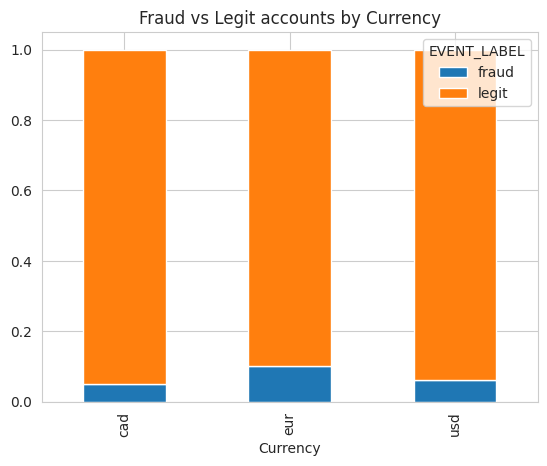

In [ ]:
currency = df_eda.groupby('currency')['EVENT_LABEL'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10,8))
currency.plot(kind='bar', stacked=True)
plt.xlabel('Currency')
plt.title('Fraud vs Legit accounts by Currency')
plt.show()

## For Email Domain and Postal Code, we will just compare the top 10 since there are so many thousands of different ones

<Figure size 1000x800 with 0 Axes>

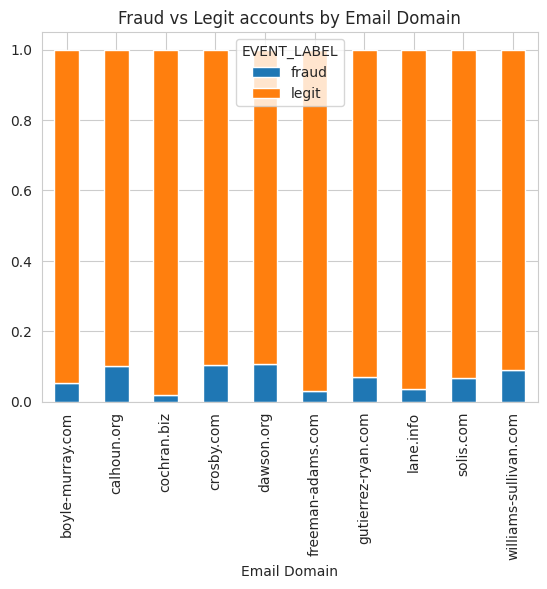

In [ ]:
#Grab top 10 emails and send to a list
top_emails = df_eda['email_domain'].value_counts().head(10).reset_index()
top_emails.columns = ['domain', 'count']
email_list = top_emails['domain'].to_list()

# find records in original data frame that have those email domains
top_email_df = df_eda[df_eda['email_domain'].isin(email_list)]

email_plot = top_email_df.groupby('email_domain')['EVENT_LABEL'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10,8))
email_plot.plot(kind='bar', stacked=True)
plt.xlabel('Email Domain')
plt.title('Fraud vs Legit accounts by Email Domain')
plt.show()

### Postal Code

<Figure size 1000x800 with 0 Axes>

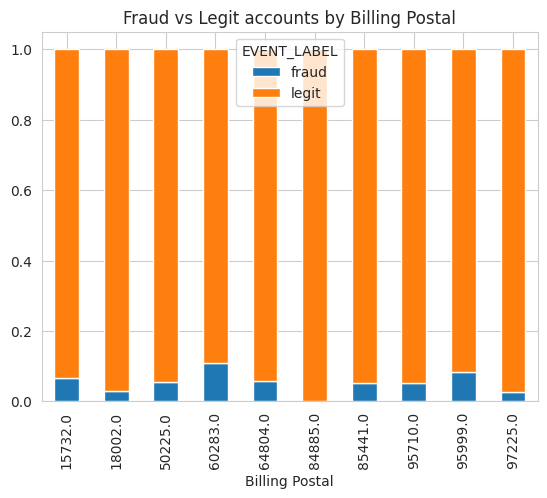

In [ ]:
#Grab top 10 postal codes and send to a list
top_postal = df_eda['billing_postal'].value_counts().head(10).reset_index()
top_postal.columns = ['postal', 'count']
postal_list = top_postal['postal'].to_list()

# find records in original data frame that have those email domains
top_postal_df = df_eda[df_eda['billing_postal'].isin(postal_list)]

postal_plot = top_postal_df.groupby('billing_postal')['EVENT_LABEL'].value_counts(normalize=True).unstack()

plt.figure(figsize=(10,8))
postal_plot.plot(kind='bar', stacked=True)
plt.xlabel('Billing Postal')
plt.title('Fraud vs Legit accounts by Billing Postal')
plt.show()

# Data Preprocessing

Import sklearn libraries and impute missing values. For the numeric columns, we will use the mean and for the categorical columns we will use the most frequent.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Identify categorical and numerical columns
categorical_cols = ['tranaction_initiate', 'transaction_type', 'transaction_env']
numerical_cols = ["account_age_days",	"transaction_amt",	"transaction_adj_amt",	"historic_velocity", "inital_amount"]
feature_names = categorical_cols + numerical_cols
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Define the target variable
y = df['EVENT_LABEL'].map({'legit': 0, 'fraud': 1})  # Convert to binary
X = df.drop('EVENT_LABEL', axis=1)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X[feature_names], y, test_size=0.3, random_state=0)


## Use Sampling Techniques

In [ ]:
# --
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
def plot_class_distribution(y, title='Class distribution'):
    counter = Counter(y)
    plt.figure(figsize=(10, 3))
    plt.bar(counter.keys(), counter.values())
    plt.title(title)
    plt.ylabel('Frequency')
    plt.xlabel('Class')
    plt.xticks(list(counter.keys()))
    plt.show()

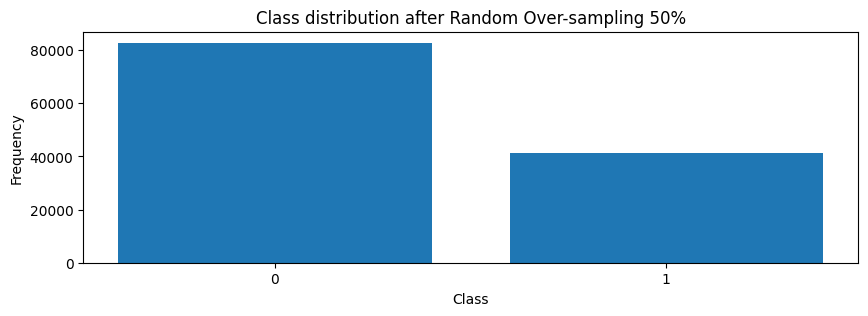

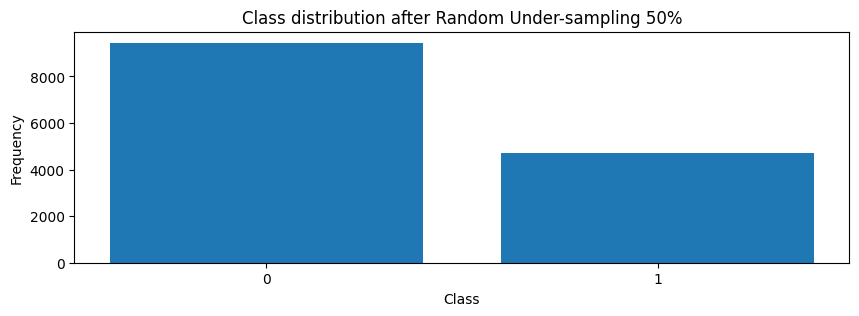

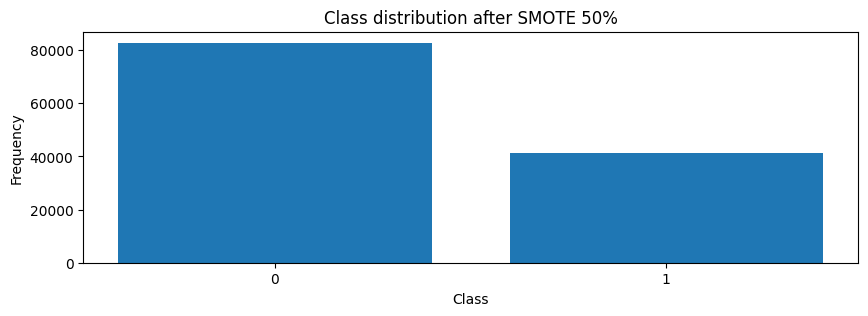

In [ ]:
#1. fit your preprocessor & apply it to both Train and Test
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

# -- oversampling --
ros = RandomOverSampler(random_state=42, sampling_strategy=0.5)
X_ros, y_ros = ros.fit_resample(X_train_prep, y_train)
plot_class_distribution(y_ros, 'Class distribution after Random Over-sampling 50%')

# -- undersampling --
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.5)
X_rus, y_rus = rus.fit_resample(X_train_prep, y_train)
plot_class_distribution(y_rus, 'Class distribution after Random Under-sampling 50%')

# -- smote --
smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_smote, y_smote = smote.fit_resample(X_train_prep, y_train)
plot_class_distribution(y_smote, 'Class distribution after SMOTE 50%')

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, f1_score

# Define the Logistic Regression - here we are not using the pipeline just model
lr_pipeline = LogisticRegression(random_state=0, max_iter=300)

# Train the Logistic Regression model
lr_model = lr_pipeline.fit(X_smote, y_smote)

# Predict and evaluate the model
lr_predictions = lr_pipeline.predict(X_test_prep)
lr_predictions_proba = lr_pipeline.predict_proba(X_test_prep)[:,1]
print("-----Basic Logistic Regression Results With SMOTE-----")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_predictions):.4f}")
print(f"Logistic Regression Precision: {precision_score(y_test, lr_predictions):.4f}")
print(f"Logistic Regression Recall: {recall_score(y_test, lr_predictions):.4f}")
print(f"Logistic Regression AUC: {roc_auc_score(y_test, lr_predictions_proba):.4f}")
print(f"Logistic Regression F1 Score: {f1_score(y_test, lr_predictions):.4f}")

-----Basic Logistic Regression Results With SMOTE-----
Logistic Regression Accuracy: 0.9391
Logistic Regression Precision: 0.4684
Logistic Regression Recall: 0.7990
Logistic Regression AUC: 0.9336
Logistic Regression F1 Score: 0.5906


In [ ]:
# prompt: extract feature names and position from pipeline to do logisic feature importance

feature_names = preprocessor.get_feature_names_out()
feature_importance = lr_model.coef_
# feature_importance = lr_pipeline.named_steps['classifier'].coef_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance[0]})
lr_feature_importance = feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

In [ ]:
lr_feature_importance.head()

,feature,importance
0,cat__transaction_env_B,5.250762
1,cat__transaction_env_J,4.954152
2,cat__transaction_env_P,4.139390
3,cat__transaction_type_J,3.317439
4,cat__transaction_type_A,2.852058


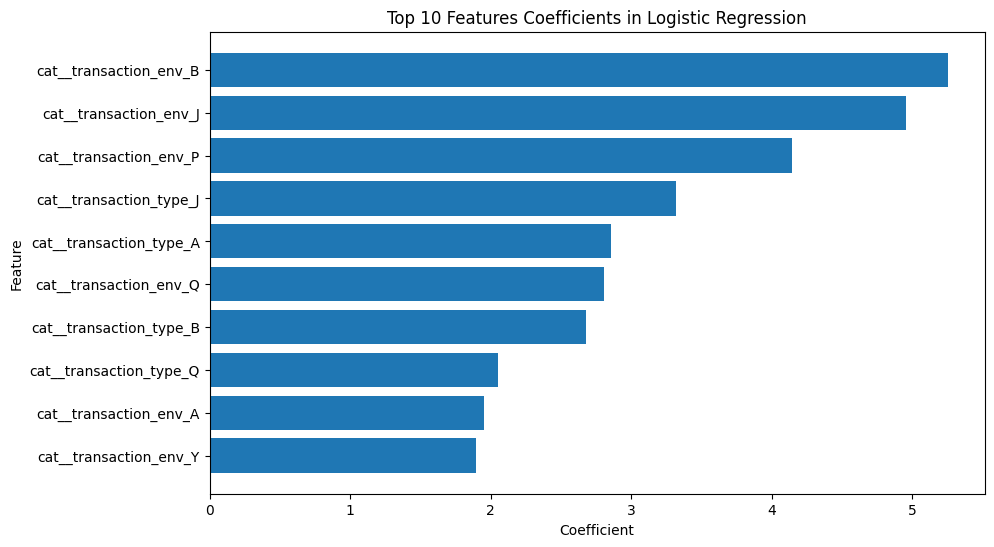

In [ ]:
# Plot for Logistic Regression
plt.figure(figsize=(10, 6))
plt.title('Top 10 Features Coefficients in Logistic Regression')
plt.barh(lr_feature_importance['feature'][:10], lr_feature_importance['importance'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# prompt: extract feature names and position from pipeline to do logisic feature importance

feature_names = preprocessor.get_feature_names_out()
# print(lr_model.coef_)
feature_importance = lr_pipeline.named_steps['classifier'].coef_
feature_importance
# feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance[0]})
# feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True)

array([[ 1.4212855 ,  0.3884678 , -1.75995676, -0.16947349,  0.00839566,
         0.04535956, -0.0908243 , -0.02624887,  0.13574975, -0.12922356,
        -0.14922199,  0.0377919 , -0.01096955, -0.0268834 ,  0.04733135,
        -0.00599145, -0.01662038, -0.13375765,  0.15562969, -0.17660257,
        -0.04718767, -0.09357522,  0.07850022,  0.14025296, -0.06759121,
         0.0433115 , -0.0182168 ,  0.14795821,  0.10005707, -0.02945318,
         0.03237317,  1.52285756,  2.62773824, -1.91424386, -0.71928063,
        -2.26440958,  0.78906145, -0.20846123,  1.33803923,  0.36487057,
         2.60368435, -0.22131752, -0.18647374, -0.94414917,  1.89830843,
        -3.00152062,  1.60784266,  2.06169005, -2.6858489 ,  1.76773551,
        -1.83354108,  1.08880241,  1.75783132, -1.32438186, -1.77931911,
        -0.11302343, -2.29054344,  1.20748811,  3.17326171, -1.39820693,
        -1.79880386, -0.64530675, -1.4354703 , -1.66596536, -0.76116074,
        -1.66115293,  2.97950144, -0.05852502, -0.0

### Try L1 logistic regression

In [ ]:
#L1 Logistic Regression
# Define the Logistic Regression pipeline
lr1_pipeline = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, random_state=0, max_iter=300)

# Train the Logistic Regression model
lr1_model = lr1_pipeline.fit(X_smote, y_smote)

# Predict and evaluate the model
lr1_predictions = lr1_pipeline.predict(X_test_prep)
lr1_predictions_proba = lr1_pipeline.predict_proba(X_test_prep)[:,1]
print("-----L1 Regularization Results-----")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr1_predictions):.4f}")
print(f"Logistic Regression Precision: {precision_score(y_test, lr1_predictions):.4f}")
print(f"Logistic Regression Recall: {recall_score(y_test, lr1_predictions):.4f}")
print(f"Logistic Regression AUC: {roc_auc_score(y_test, lr1_predictions_proba):.4f}")
print(f"Logistic Regression F1 Score: {f1_score(y_test, lr1_predictions):.4f}")

-----L1 Regularization Results-----
Logistic Regression Accuracy: 0.9392
Logistic Regression Precision: 0.4688
Logistic Regression Recall: 0.7981
Logistic Regression AUC: 0.9330
Logistic Regression F1 Score: 0.5906


### L2 Regularization

In [ ]:
#L1 Logistic Regression
# Define the Logistic Regression pipeline
lr2_pipeline = LogisticRegression(penalty='l2', solver='liblinear', random_state=0, max_iter=300)

# Train the Logistic Regression model
lr2_model = lr2_pipeline.fit(X_smote, y_smote)

# Predict and evaluate the model
lr2_predictions = lr2_pipeline.predict(X_test_prep)
lr2_predictions_proba = lr2_pipeline.predict_proba(X_test_prep)[:,1]
print("-----L2 Regularization Results-----")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr2_predictions):.4f}")
print(f"Logistic Regression Precision: {precision_score(y_test, lr2_predictions):.4f}")
print(f"Logistic Regression Recall: {recall_score(y_test, lr2_predictions):.4f}")
print(f"Logistic Regression AUC: {roc_auc_score(y_test, lr2_predictions_proba):.4f}")
print(f"Logistic Regression F1 Score: {f1_score(y_test, lr2_predictions):.4f}")

-----L2 Regularization Results-----
Logistic Regression Accuracy: 0.9392
Logistic Regression Precision: 0.4685
Logistic Regression Recall: 0.7990
Logistic Regression AUC: 0.9336
Logistic Regression F1 Score: 0.5907


### Elastic Net

In [ ]:
#Elastic Logistic Regression
# Define the Logistic Regression pipeline
lr_en_pipeline = LogisticRegression(penalty='elasticnet', l1_ratio = 0.5, solver='saga', random_state=0, max_iter=300)

# Train the Logistic Regression model
lr_en_model = lr_en_pipeline.fit(X_smote, y_smote)

# Predict and evaluate the model
lr_en_predictions = lr_en_pipeline.predict(X_test_prep)
lr_en_predictions_proba = lr_en_pipeline.predict_proba(X_test_prep)[:,1]
print("-----L2 Regularization Results-----")
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, lr_en_predictions):.4f}")
print(f"Logistic Regression Precision: {precision_score(y_test, lr_en_predictions):.4f}")
print(f"Logistic Regression Recall: {recall_score(y_test, lr_en_predictions):.4f}")
print(f"Logistic Regression AUC: {roc_auc_score(y_test, lr_en_predictions_proba):.4f}")
print(f"Logistic Regression F1 Score: {f1_score(y_test, lr_en_predictions):.4f}")

-----L2 Regularization Results-----
Logistic Regression Accuracy: 0.9392
Logistic Regression Precision: 0.4685
Logistic Regression Recall: 0.7990
Logistic Regression AUC: 0.9336
Logistic Regression F1 Score: 0.5907


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### The basic logistic regression produced the best results so we will use it as our Logistic model

In [ ]:
# prompt: extract feature names and position from pipeline to do logisic feature importance

feature_names = preprocessor.get_feature_names_out()
feature_importance = lr_model.coef_
# feature_importance = lr_pipeline.named_steps['classifier'].coef_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importance[0]})
feature_importance_df.sort_values(by='importance', ascending=False).reset_index(drop=True).head(10)

,feature,importance
0,cat__transaction_env_B,5.250762
1,cat__transaction_env_J,4.954152
2,cat__transaction_env_P,4.139390
3,cat__transaction_type_J,3.317439
4,cat__transaction_type_A,2.852058
5,cat__transaction_env_Q,2.808812
6,cat__transaction_type_B,2.675560
7,cat__transaction_type_Q,2.047857
8,cat__transaction_env_A,1.953995
9,cat__transaction_env_Y,1.892403


## Coefficients

With Logistic Regression, variables with larger coefficients will have a greater impact on predicting the target variable. Here we can see that our most impactful variables were:

*   Transaction Enviornment
*   Transaction Type



### Plot Logistic Regression AUC

In [ ]:
from sklearn.metrics import roc_curve
import numpy as np
# Predict probabilities for the positive class
y_scores = lr_pipeline.predict_proba(X_test_prep)[:, 1]
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, y_scores)
# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, lr_fpr, lr_tpr)
interp_thresholds = np.interp(target_fpr, lr_fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")

Target FPR: 0.01, Expected TPR: 0.6068, Threshold: 0.8296
Target FPR: 0.02, Expected TPR: 0.6990, Threshold: 0.7220
Target FPR: 0.03, Expected TPR: 0.7413, Threshold: 0.6420
Target FPR: 0.04, Expected TPR: 0.7748, Threshold: 0.5683
Target FPR: 0.05, Expected TPR: 0.7951, Threshold: 0.5122
Target FPR: 0.06, Expected TPR: 0.8126, Threshold: 0.4648
Target FPR: 0.07, Expected TPR: 0.8316, Threshold: 0.4202
Target FPR: 0.08, Expected TPR: 0.8408, Threshold: 0.3850
Target FPR: 0.09, Expected TPR: 0.8519, Threshold: 0.3521
Target FPR: 0.10, Expected TPR: 0.8631, Threshold: 0.3243


In [ ]:
import pandas as pd

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df

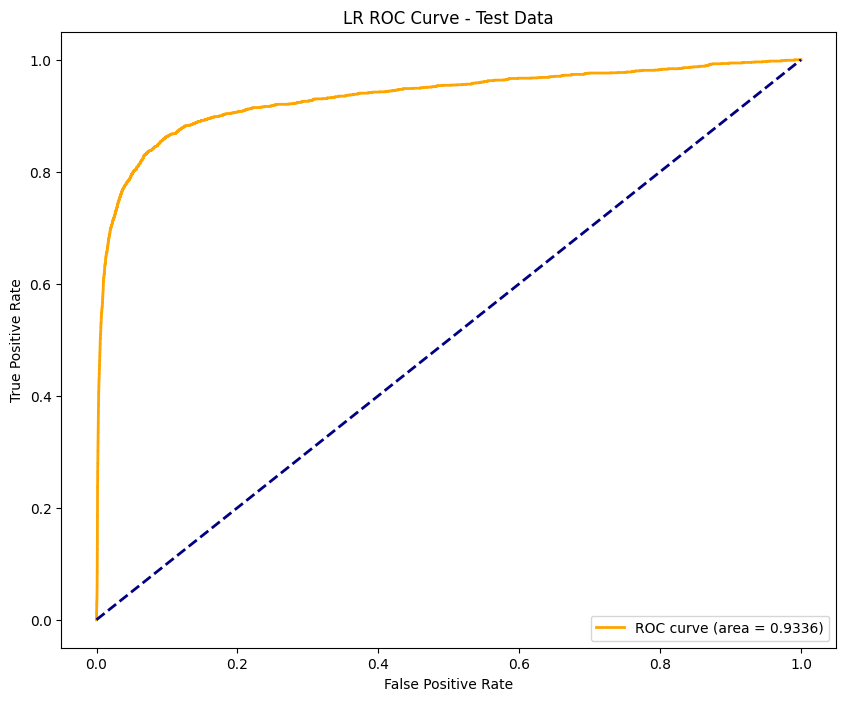

In [ ]:
lr_auc = auc(lr_fpr, lr_tpr)

plt.figure(figsize=(10,8))
plt.plot(lr_fpr, lr_tpr, lw = 2, color='orange', label = 'ROC curve (area = %0.4f)' % lr_auc)
plt.plot([0,1],[0,1], color = 'navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LR ROC Curve - Test Data')
plt.legend(loc='lower right')
plt.show()

# Random Forest

### Start with baseline model with 50 estimators

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Define the RandomForestClassifier - here we are not using the pipeline just model
rf_pipeline = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=0)

# Train the RandomForestClassifier model
rf_pipeline.fit(X_smote, y_smote)

# Predict and evaluate the model
rf_predictions = rf_pipeline.predict(X_test_prep)
rf_predictions_proba = rf_pipeline.predict_proba(X_test_prep)[:,1]
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_predictions):.4f}")
print(f"Random Forest Precision: {precision_score(y_test, rf_predictions):.4f}")
print(f"Random Forest Recall: {recall_score(y_test, rf_predictions):.4f}")
print(f"Random Forest AUC: {roc_auc_score(y_test, rf_predictions_proba):.4f}")
print(f"Random Forest F1 Score: {f1_score(y_test, rf_predictions):.4f}")

Random Forest Accuracy: 0.9717
Random Forest Precision: 0.7867
Random Forest Recall: 0.6641
Random Forest AUC: 0.9299
Random Forest F1 Score: 0.7202


### Use Grid Search to find best parameters

using recall as scoring method

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=0)

# Create the parameter grid
param_grid = {
    'n_estimators': [20, 30, 50],
    'max_depth': [None, 5, 10],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_smote, y_smote)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best parameters:
  max_depth: None
  min_samples_leaf: 1
  min_samples_split: 10
  n_estimators: 50


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest pipeline
rf_tuned_pipeline = RandomForestClassifier(min_samples_leaf = 1, min_samples_split = 10, n_estimators=50, n_jobs = -1, random_state=0)

# Train the RandomForestClassifier model
rf_tuned_pipeline.fit(X_smote, y_smote)

# Predict and evaluate the model
rf_tuned_predictions = rf_tuned_pipeline.predict(X_test_prep)
rf_tuned_predictions_proba = rf_tuned_pipeline.predict_proba(X_test_prep)[:,1]
print(f"Random Forest Accuracy: {accuracy_score(y_test, rf_tuned_predictions):.4f}")
print(f"Random Forest Precision: {precision_score(y_test, rf_tuned_predictions):.4f}")
print(f"Random Forest Recall: {recall_score(y_test, rf_tuned_predictions):.4f}")
print(f"Random Forest AUC: {roc_auc_score(y_test, rf_tuned_predictions_proba):.4f}")
print(f"Random Forest F1 Score: {f1_score(y_test, rf_tuned_predictions):.4f}")

Random Forest Accuracy: 0.9709
Random Forest Precision: 0.7581
Random Forest Recall: 0.6893
Random Forest AUC: 0.9343
Random Forest F1 Score: 0.7221


### Best Random Forest was from Recall GridSearch

In [ ]:
from sklearn.metrics import roc_curve
import numpy as np
# Predict probabilities for the positive class
y_scores = rf_tuned_pipeline.predict_proba(X_test_prep)[:, 1]
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_scores)
# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, rf_fpr, rf_tpr)
interp_thresholds = np.interp(target_fpr, rf_fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")


Target FPR: 0.01, Expected TPR: 0.6592, Threshold: 0.5504
Target FPR: 0.02, Expected TPR: 0.7296, Threshold: 0.4147
Target FPR: 0.03, Expected TPR: 0.7748, Threshold: 0.3224
Target FPR: 0.04, Expected TPR: 0.8044, Threshold: 0.2616
Target FPR: 0.05, Expected TPR: 0.8228, Threshold: 0.2184
Target FPR: 0.06, Expected TPR: 0.8408, Threshold: 0.1890
Target FPR: 0.07, Expected TPR: 0.8500, Threshold: 0.1661
Target FPR: 0.08, Expected TPR: 0.8626, Threshold: 0.1480
Target FPR: 0.09, Expected TPR: 0.8699, Threshold: 0.1331
Target FPR: 0.10, Expected TPR: 0.8709, Threshold: 0.1220


In [ ]:
import pandas as pd

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df


,Target FPR (%),Expected TPR,Threshold
0,1.0,0.659223,0.550396
1,2.0,0.729612,0.414657
2,3.0,0.774757,0.322447
3,4.0,0.804369,0.261586
4,5.0,0.822816,0.218418
5,6.0,0.840777,0.189030
6,7.0,0.850000,0.166118
7,8.0,0.862621,0.147963
8,9.0,0.869903,0.133093
9,10.0,0.870874,0.122006


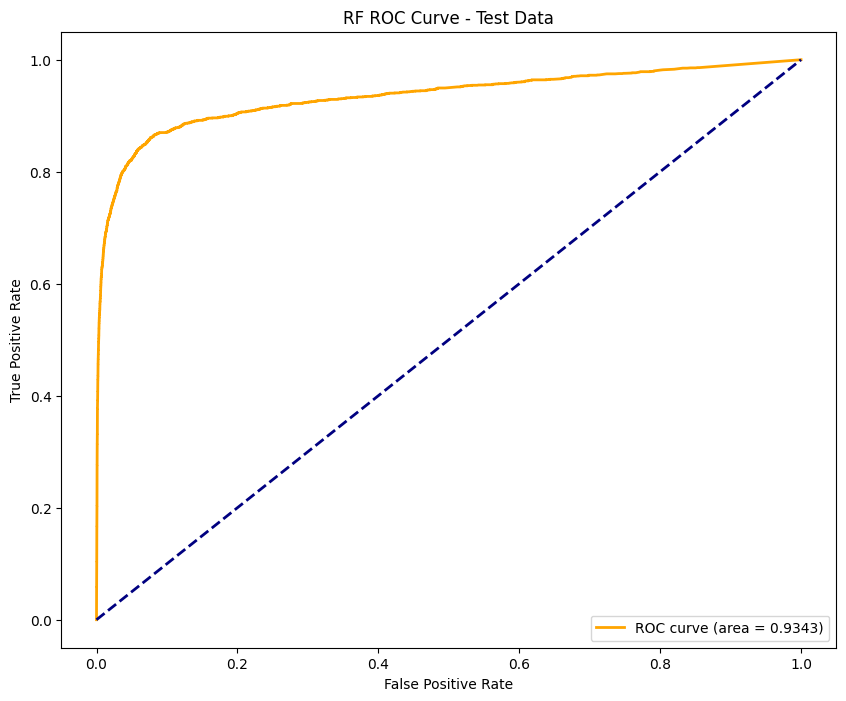

In [ ]:
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(10,8))
plt.plot(rf_fpr, rf_tpr, lw = 2, color='orange', label = 'ROC curve (area = %0.4f)' % rf_auc)
plt.plot([0,1],[0,1], color = 'navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RF ROC Curve - Test Data')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

rf_importances = rf_tuned_pipeline.feature_importances_

# Display the top 10 features
rf_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': rf_importances})
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
rf_feature_importance_df.head(10)


,Feature,Importance
2,transaction_adj_amt,0.373045
0,account_age_days,0.122809
1,transaction_amt,0.054720
3,historic_velocity,0.034537
78,transaction_env_V,0.019003
51,transaction_type_U,0.018692
54,transaction_type_X,0.018526
75,transaction_env_S,0.018467
53,transaction_type_W,0.018005
4,inital_amount,0.017722


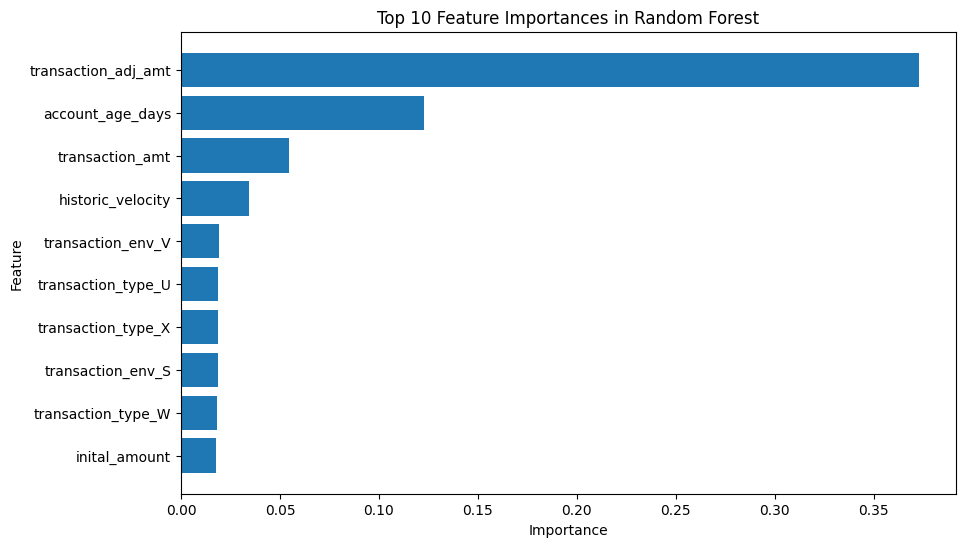

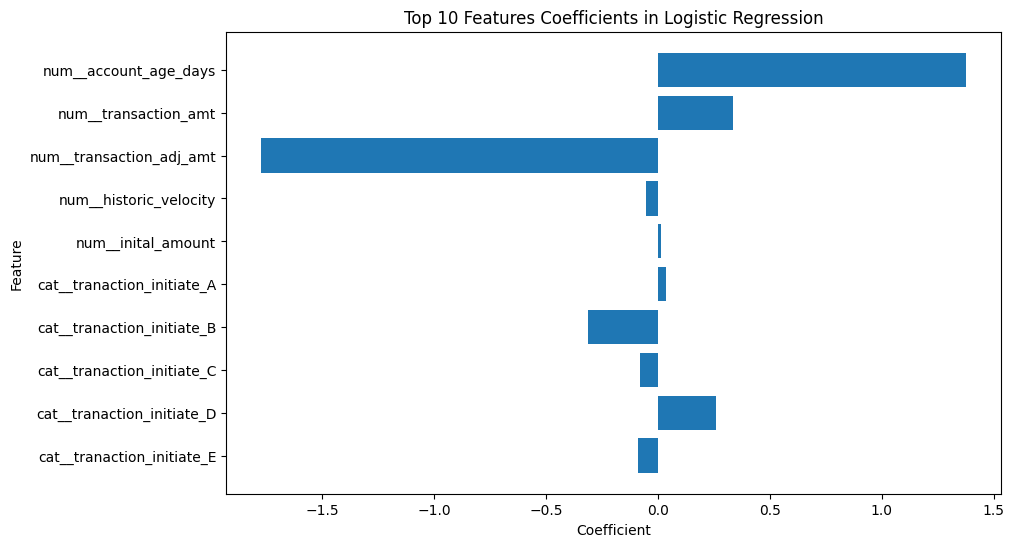

In [ ]:
import matplotlib.pyplot as plt

# Plot for Random Forest
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Random Forest')
plt.barh(rf_feature_importance_df['Feature'][:10], rf_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

# Plot for Logistic Regression
plt.figure(figsize=(10, 6))
plt.title('Top 10 Features Coefficients in Logistic Regression')
plt.barh(feature_importance_df['feature'][:10], feature_importance_df['importance'][:10])
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


# Gradient Boosting

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, f1_score

gbm_pipeline = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.1, n_estimators=20, random_state = 0)



# Train the pipeline
gbm_pipeline.fit(X_smote, y_smote)

# Predict and evaluate the model
gbm_predictions = gbm_pipeline.predict(X_test_prep)
gbm_predictions_proba = gbm_pipeline.predict_proba(X_test_prep)[:,1]
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gbm_predictions):.4f}")
print(f"Gradient Boosting Precision: {precision_score(y_test, gbm_predictions):.4f}")
print(f"Gradient Boosting Recall: {recall_score(y_test, gbm_predictions):.4f}")
print(f"Gradient Boosting AUC: {roc_auc_score(y_test, gbm_predictions_proba):.4f}")
print(f"Gradient Boosting F1 Score: {f1_score(y_test, gbm_predictions):.4f}")

Gradient Boosting Accuracy: 0.9462
Gradient Boosting Precision: 0.5072
Gradient Boosting Recall: 0.7044
Gradient Boosting AUC: 0.9139
Gradient Boosting F1 Score: 0.5897


### Grid Search for Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Create the parameter grid
param_grid = {
    'n_estimators': [50, 100,200],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(gbm_pipeline, param_grid, cv=3, n_jobs=-1, scoring='roc_auc', verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_smote, y_smote)

# Get the best set of hyperparameters
best_params = grid_search.best_params_

# Print the best set of hyperparameters
print("Best parameters:")
for key, value in best_params.items():
    print(f"  {key}: {value}")

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters:
  learning_rate: 0.2
  n_estimators: 200


### Use parameters found from GridSearch in XGBoost

In [ ]:

gbm_tuned_pipeline = xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.2, n_estimators=200, random_state=0)


# Train the pipeline
gbm_tuned_pipeline.fit(X_smote, y_smote)

# Predict and evaluate the model
gbm_tuned_predictions = gbm_tuned_pipeline.predict(X_test_prep)
gbm_tuned_predictions_proba = gbm_tuned_pipeline.predict_proba(X_test_prep)[:,1]
print(f"Gradient Boosting Accuracy: {accuracy_score(y_test, gbm_tuned_predictions):.4f}")
print(f"Gradient Boosting Precision: {precision_score(y_test, gbm_tuned_predictions):.4f}")
print(f"Gradient Boosting Recall: {recall_score(y_test, gbm_tuned_predictions):.4f}")
print(f"Gradient Boosting AUC: {roc_auc_score(y_test, gbm_tuned_predictions_proba):.4f}")
print(f"Gradient Boosting F1 Score: {f1_score(y_test, gbm_tuned_predictions):.4f}")

Gradient Boosting Accuracy: 0.9736
Gradient Boosting Precision: 0.8150
Gradient Boosting Recall: 0.6714
Gradient Boosting AUC: 0.9396
Gradient Boosting F1 Score: 0.7362


In [ ]:
X_test_prep

<37500x83 sparse matrix of type '<class 'numpy.float64'>'
	with 300000 stored elements in Compressed Sparse Row format>

### Gradient Boosting Feature Importance

In [ ]:
# Adjusting the feature name extraction for OneHotEncoder to use get_feature_names_out
feature_names = list(preprocessor.transformers_[0][2]) + \
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols))

gbm_importances = gbm_tuned_pipeline.feature_importances_

# Display the top 10 features
gbm_feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': gbm_importances})
gbm_feature_importance_df = gbm_feature_importance_df.sort_values(by='Importance', ascending=False)
gbm_feature_importance_df.head(10)


,Feature,Importance
2,transaction_adj_amt,0.056886
33,transaction_type_C,0.027655
12,tranaction_initiate_H,0.026337
0,account_age_days,0.023484
56,transaction_type_Z,0.022521
15,tranaction_initiate_K,0.022417
28,tranaction_initiate_X,0.021821
54,transaction_type_X,0.021543
53,transaction_type_W,0.021131
23,tranaction_initiate_S,0.020766


## Plot Feature Importance

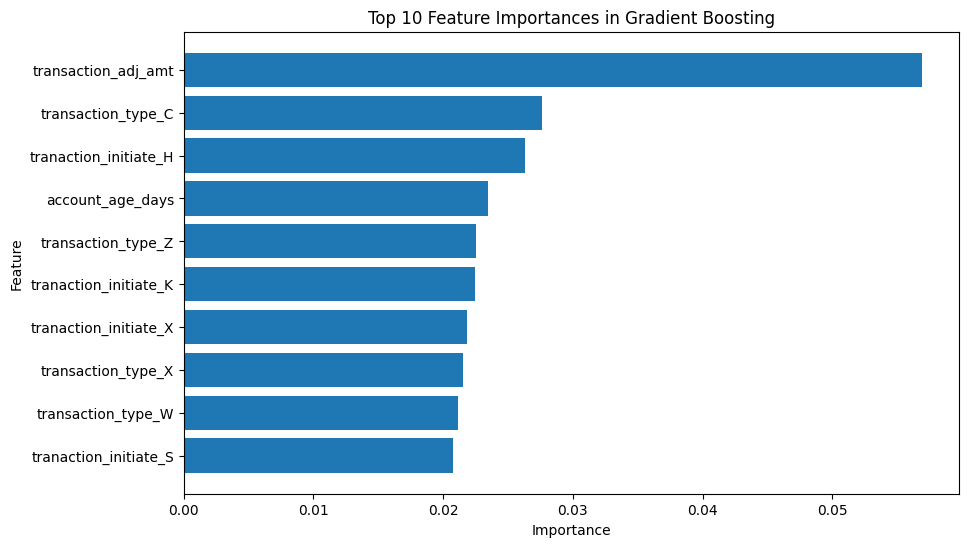

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in Gradient Boosting')
plt.barh(gbm_feature_importance_df ['Feature'][:10], gbm_feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
import numpy as np
# Predict probabilities for the positive class
y_scores = gbm_tuned_pipeline.predict_proba(X_test_prep)[:, 1]
gbm_fpr, gbm_tpr, thresholds = roc_curve(y_test, y_scores)
# Define target FPR values
target_fpr = np.arange(0.01, 0.11, 0.01)  # From 1% to 10%

# Interpolate to find TPR and threshold for target FPRs
interp_tpr = np.interp(target_fpr, gbm_fpr, gbm_tpr)
interp_thresholds = np.interp(target_fpr, gbm_fpr, thresholds)

# Print the results
for i in range(len(target_fpr)):
    print(f"Target FPR: {target_fpr[i]:.2f}, Expected TPR: {interp_tpr[i]:.4f}, Threshold: {interp_thresholds[i]:.4f}")

Target FPR: 0.01, Expected TPR: 0.6845, Threshold: 0.4712
Target FPR: 0.02, Expected TPR: 0.7398, Threshold: 0.2935
Target FPR: 0.03, Expected TPR: 0.7772, Threshold: 0.1932
Target FPR: 0.04, Expected TPR: 0.8034, Threshold: 0.1380
Target FPR: 0.05, Expected TPR: 0.8218, Threshold: 0.1059
Target FPR: 0.06, Expected TPR: 0.8354, Threshold: 0.0843
Target FPR: 0.07, Expected TPR: 0.8476, Threshold: 0.0680
Target FPR: 0.08, Expected TPR: 0.8592, Threshold: 0.0578
Target FPR: 0.09, Expected TPR: 0.8670, Threshold: 0.0501
Target FPR: 0.10, Expected TPR: 0.8752, Threshold: 0.0440


In [ ]:
import pandas as pd

# Create a DataFrame from the target FPR, interpolated TPR, and interpolated thresholds
target_fpr_df = pd.DataFrame({
    'Target FPR (%)': target_fpr * 100,  # Convert to percentage
    'Expected TPR': interp_tpr,
    'Threshold': interp_thresholds
})

# Display the DataFrame
target_fpr_df


,Target FPR (%),Expected TPR,Threshold
0,1.0,0.684466,0.471234
1,2.0,0.739806,0.293512
2,3.0,0.777184,0.193249
3,4.0,0.803398,0.137966
4,5.0,0.821845,0.105866
5,6.0,0.835437,0.084312
6,7.0,0.847573,0.067973
7,8.0,0.859223,0.057772
8,9.0,0.866990,0.050063
9,10.0,0.875243,0.043959


### Plot AUC for XGBoost

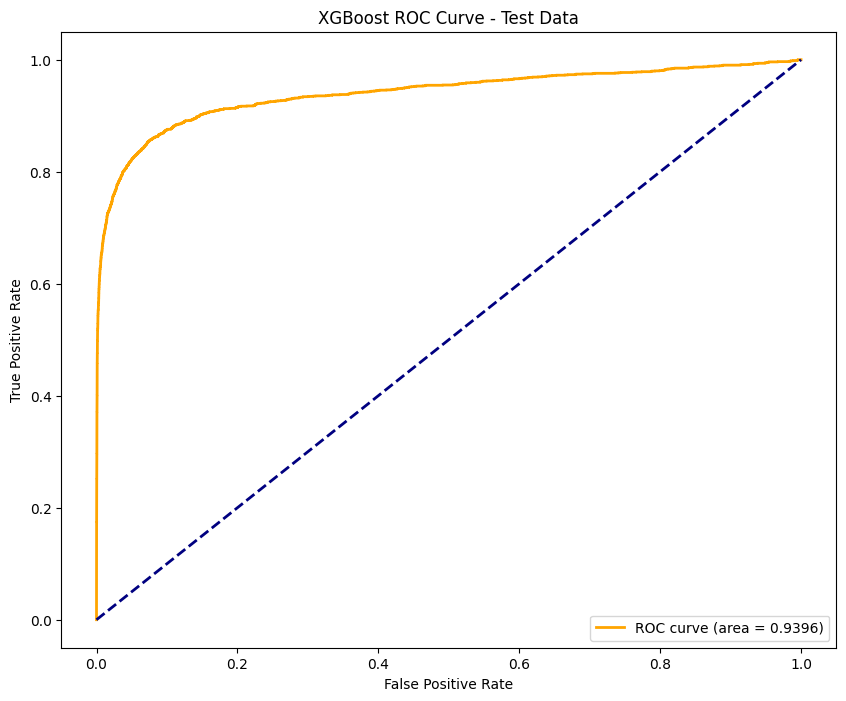

In [ ]:
gbm_auc = auc(gbm_fpr, gbm_tpr)

plt.figure(figsize=(10,8))
plt.plot(gbm_fpr, gbm_tpr, lw = 2, color='orange', label = 'ROC curve (area = %0.4f)' % gbm_auc)
plt.plot([0,1],[0,1], color = 'navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve - Test Data')
plt.legend(loc='lower right')
plt.show()

# Combine ROC Curves

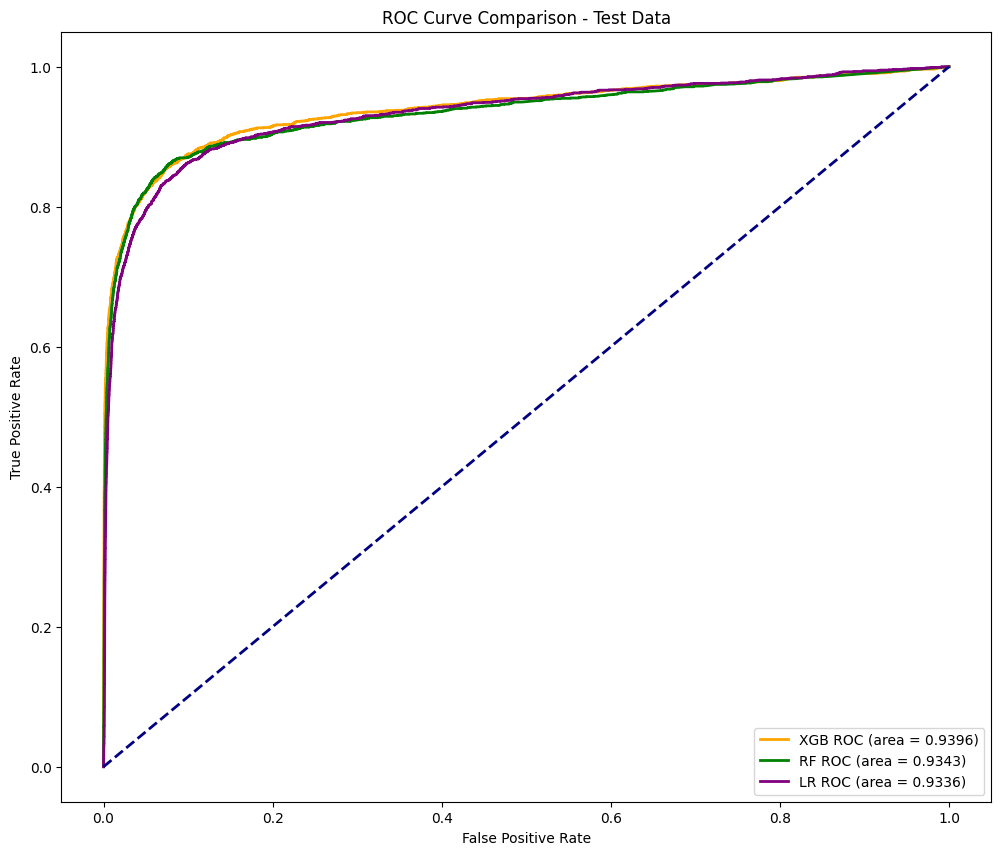

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(gbm_fpr, gbm_tpr, lw = 2, color='orange', label = 'XGB ROC (area = %0.4f)' % gbm_auc)
plt.plot(rf_fpr, rf_tpr, lw = 2, color='green', label = 'RF ROC (area = %0.4f)' % rf_auc)
plt.plot(lr_fpr, lr_tpr, lw = 2, color='purple', label = 'LR ROC (area = %0.4f)' % lr_auc)
plt.plot([0,1],[0,1], color = 'navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison - Test Data')
plt.legend(loc='lower right')
plt.show()

# Predict Hold out data set with XGBoost Tuned Model

In [ ]:
# Unzip the file
with zipfile.ZipFile('/content/drive/MyDrive/Spring/6053 - Machine Learning/Project 2/project_2_holdout.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('')

# Load the dataset
holdout = pd.read_csv('project_2_holdout.csv')

# Display the first few rows of the dataframe
holdout.head()

,EVENT_ID,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,...,transaction_type,transaction_env,EVENT_TIMESTAMP,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount
0,109420,4462,3648,54,6325,197.108.209.59,Opera/8.29.(X11; Linux i686; mk-MK) Presto/2.9...,perez-smith.org,+1-776-557-7526x274,Danielville,...,D,G,3/28/21 22:17,Mrs. Dawn Murray,414 Gregory Mountains Suite 443,618-52-2474,gd_GB,O,23.0,2422.0
1,1049060,3360,2180,54,4030,178.166.190.20,Opera/8.16.(X11; Linux i686; is-IS) Presto/2.9...,morris-diaz.com,001-427-310-1481x093,Thompsonshire,...,D,F,5/29/21 6:26,William Hughes,67405 Higgins Ways,651-14-8114,iu_CA,U,58.0,2160.0
2,2805320,4725,2063,60,4372,163.48.86.34,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,campos-brown.net,073.152.2261,North Lisaburgh,...,U,Z,3/17/21 7:35,Jennifer Johnson,41514 Toni Junction Suite 866,824-13-0148,yue_HK,O,34.0,14474.0
3,450840,5336,2319,72,4385,55.233.5.10,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10 1...,hanna-taylor.com,835-295-8283x42594,Joelville,...,X,W,4/26/21 5:34,Brenda Hopkins,1991 Angela Falls,633-56-8621,sa_IN,Y,84.0,13297.0
4,423160,6115,3413,61,5942,119.228.12.223,Opera/8.21.(X11; Linux i686; cv-RU) Presto/2.9...,gregory.com,424.203.8183,Hallburgh,...,D,W,1/17/21 13:25,Patricia Davis,57145 Walton Valleys Suite 250,636-15-1188,doi_IN,I,89.0,5425.0


In [ ]:
# Identify categorical and numerical columns
categorical_cols = ['tranaction_initiate', 'transaction_type', 'transaction_env']
numerical_cols = ["account_age_days",	"transaction_amt",	"transaction_adj_amt",	"historic_velocity", "inital_amount"]
feature_names = categorical_cols + numerical_cols
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])


## Need to Reinitialize the pipeline

In [ ]:
gbm_pipeline2 = Pipeline([
    ('preprocess', preprocessor),
    ('classifier',xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.2, n_estimators=200, random_state=0))
])

In [ ]:
gbm_pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['account_age_days',
                                                   'transaction_amt',
                                                   'transaction_adj_amt',
                                                   'historic_velocity',
                                                   'inital_amount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unk...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=0, ...))])

In [ ]:
# Predict on the new dataset
holdout_class = gbm_pipeline2.predict(holdout[feature_names])
holdout_proba = gbm_pipeline2.predict_proba(holdout[feature_names])

holdout['pred_fraud'] = holdout_class
holdout['pred_prob_fraud'] = holdout_proba[:,1]
holdout['pred_prob_legit'] = holdout_proba[:,0]



,EVENT_ID,account_age_days,transaction_amt,transaction_adj_amt,historic_velocity,ip_address,user_agent,email_domain,phone_number,billing_city,...,applicant_name,billing_address,merchant_id,locale,tranaction_initiate,days_since_last_logon,inital_amount,pred_fraud,pred_prob_fraud,pred_prob_legit
0,109420,4462,3648,54,6325,197.108.209.59,Opera/8.29.(X11; Linux i686; mk-MK) Presto/2.9...,perez-smith.org,+1-776-557-7526x274,Danielville,...,Mrs. Dawn Murray,414 Gregory Mountains Suite 443,618-52-2474,gd_GB,O,23.0,2422.0,0,0.003727,0.996273
1,1049060,3360,2180,54,4030,178.166.190.20,Opera/8.16.(X11; Linux i686; is-IS) Presto/2.9...,morris-diaz.com,001-427-310-1481x093,Thompsonshire,...,William Hughes,67405 Higgins Ways,651-14-8114,iu_CA,U,58.0,2160.0,0,0.002835,0.997165
2,2805320,4725,2063,60,4372,163.48.86.34,Mozilla/5.0 (X11; Linux x86_64; rv:1.9.5.20) G...,campos-brown.net,073.152.2261,North Lisaburgh,...,Jennifer Johnson,41514 Toni Junction Suite 866,824-13-0148,yue_HK,O,34.0,14474.0,0,0.001223,0.998777
3,450840,5336,2319,72,4385,55.233.5.10,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10 1...,hanna-taylor.com,835-295-8283x42594,Joelville,...,Brenda Hopkins,1991 Angela Falls,633-56-8621,sa_IN,Y,84.0,13297.0,0,0.002365,0.997635
4,423160,6115,3413,61,5942,119.228.12.223,Opera/8.21.(X11; Linux i686; cv-RU) Presto/2.9...,gregory.com,424.203.8183,Hallburgh,...,Patricia Davis,57145 Walton Valleys Suite 250,636-15-1188,doi_IN,I,89.0,5425.0,0,0.004449,0.995551


In [ ]:
holdout_scored = holdout[['EVENT_ID', 'pred_fraud']]
holdout_scored.columns = ['EVENT_ID', 'P_EVENT_LABEL']

In [ ]:
scored_file = 'HoldoutScored.xlsx'
holdout_scored.to_excel(scored_file)

# Confusion Matrices

In [ ]:
# Calculate confusion matrix
matrix = confusion_matrix(match_file['expected_match'],
                          match_file['predicted_match50'],
                          labels=["match", "no match"])

print(matrix)

In [ ]:
# Plotting using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.title("Confusion Matrix - Facial Recognition")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()